In [ ]:
# !pip install openai
# !pip install --upgrade pip
# !pip install dotenv

In [21]:
import openai
import os

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key  = OPENAI_API_KEY

In [22]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In [9]:
import pandas as pd

In [42]:
df = pd.read_csv('TB_demo_v2.csv')
df.head()

,Fname,BatchID,Fidx,elapsed time,optical density,Monitor photo density,stage temperature,sample temperature,monitor temperature,Type,...,Rxy State,sheet resistance,Hall resistance,Hall resistivity,conductivity,Hall coefficient,sigma square hall coefficient,Hall density,Hall mobility,wavelength
0,H:\Other computers\PDL-HALL01\Users\Oki\QHOT01...,P1HB,1,739085.5081,10.0,5.550000e-13,NaN,298,NaN,P,...,59+61,236602.9296,2989.585106,172.720139,0.005790,3.358157,0.000113,1.860000e+18,0.019443,450
1,H:\Other computers\PDL-HALL01\Users\Oki\QHOT01...,P1HB,2,739085.5149,7.8,2.470000e-08,NaN,298,NaN,P,...,59+61,234032.6895,2913.599011,170.843863,0.005853,3.272803,0.000112,1.910000e+18,0.019157,450
2,H:\Other computers\PDL-HALL01\Users\Oki\QHOT01...,P1HB,3,739085.5217,7.0,1.210000e-10,NaN,298,NaN,P,...,59+61,236387.3248,2972.459957,172.562747,0.005795,3.338920,0.000112,1.870000e+18,0.019349,450
3,H:\Other computers\PDL-HALL01\Users\Oki\QHOT01...,P1HB,4,739085.5285,6.0,1.760000e-10,NaN,298,NaN,P,...,59+61,236998.8528,2968.373827,173.009163,0.005780,3.334331,0.000111,1.870000e+18,0.019273,450
4,H:\Other computers\PDL-HALL01\Users\Oki\QHOT01...,P1HB,5,739085.5353,5.0,8.060000e-10,NaN,298,NaN,P,...,59+61,236463.4924,2970.220872,172.618350,0.005793,3.336405,0.000112,1.870000e+18,0.019328,450


In [57]:
len(df)

105

In [38]:
df.columns

Index(['Fname', 'BatchID', 'Fidx', 'elapsed time', 'optical density',
       'Monitor photo density', 'stage temperature', 'sample temperature',
       'monitor temperature', 'Type', 'Rxx State', 'Rxy State',
       'sheet resistance', 'Hall resistance', 'Hall resistivity',
       'conductivity', 'Hall coefficient', 'sigma square hall coefficient',
       'Hall density', 'Hall mobility', 'wavelength'],
      dtype='object')

In [43]:
df.columns = ['Fname', 'BatchID', 'Fidx', 'elapsed_time', 'optical_density',
       'Monitor_photo_density', 'stage_temperature', 'sample_temperature',
       'monitor_temperature', 'Type', 'Rxx_State', 'Rxy_State',
       'sheet_resistance', 'Hall_resistance', 'Hall_resistivity',
       'conductivity', 'Hall_coefficient', 'sigma_square_hall_coefficient',
       'Hall_density', 'Hall_mobility', 'wavelength']

In [51]:
drop_columns = ['stage_temperature', 'monitor_temperature', 'Rxx_State', 'Rxy_State', 'Type']



In [53]:
df = df.drop(drop_columns, axis = 1)


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert numeric columns to numeric data types
num_cols = ['elapsed_time', 'optical_density',
       'Monitor_photo_density', 'sample_temperature', 
       'sheet_resistance', 'Hall_resistance', 'Hall_resistivity',
       'conductivity', 'Hall_coefficient', 'sigma_square_hall_coefficient',
       'Hall_density', 'Hall_mobility', 'wavelength']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Check for missing values
print(df.isnull().sum())


Fname                            0
BatchID                          0
Fidx                             0
elapsed_time                     0
optical_density                  0
Monitor_photo_density            0
sample_temperature               0
sheet_resistance                 0
Hall_resistance                  0
Hall_resistivity                 0
conductivity                     0
Hall_coefficient                 0
sigma_square_hall_coefficient    0
Hall_density                     0
Hall_mobility                    0
wavelength                       0
dtype: int64


In [55]:
# Descriptive statistics
print(df.describe())


             Fidx   elapsed_time  optical_density  Monitor_photo_density  \
count  105.000000     105.000000       105.000000           1.050000e+02   
mean    11.000000  739085.861852         3.335714           1.059732e-04   
std      6.084343       0.207396         3.172036           2.517114e-04   
min      1.000000  739085.508100         0.000000           5.190000e-14   
25%      6.000000  739085.684800         0.500000           9.730000e-09   
50%     11.000000  739085.861700         2.500000           1.630000e-06   
75%     16.000000  739086.039000         5.000000           8.910000e-05   
max     21.000000  739086.215600        10.000000           1.416397e-03   

       sample_temperature  sheet_resistance  Hall_resistance  \
count               105.0        105.000000       105.000000   
mean                298.0     144615.601354      1124.544124   
std                   0.0      88353.941429      1664.828676   
min                 298.0       5555.244215     -1631.73023

<AxesSubplot:>

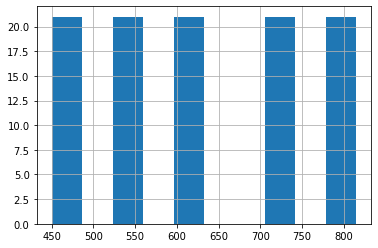

In [60]:
df.wavelength.hist()

<AxesSubplot:>

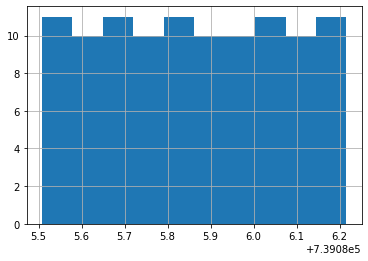

In [61]:
df.elapsed_time.hist()

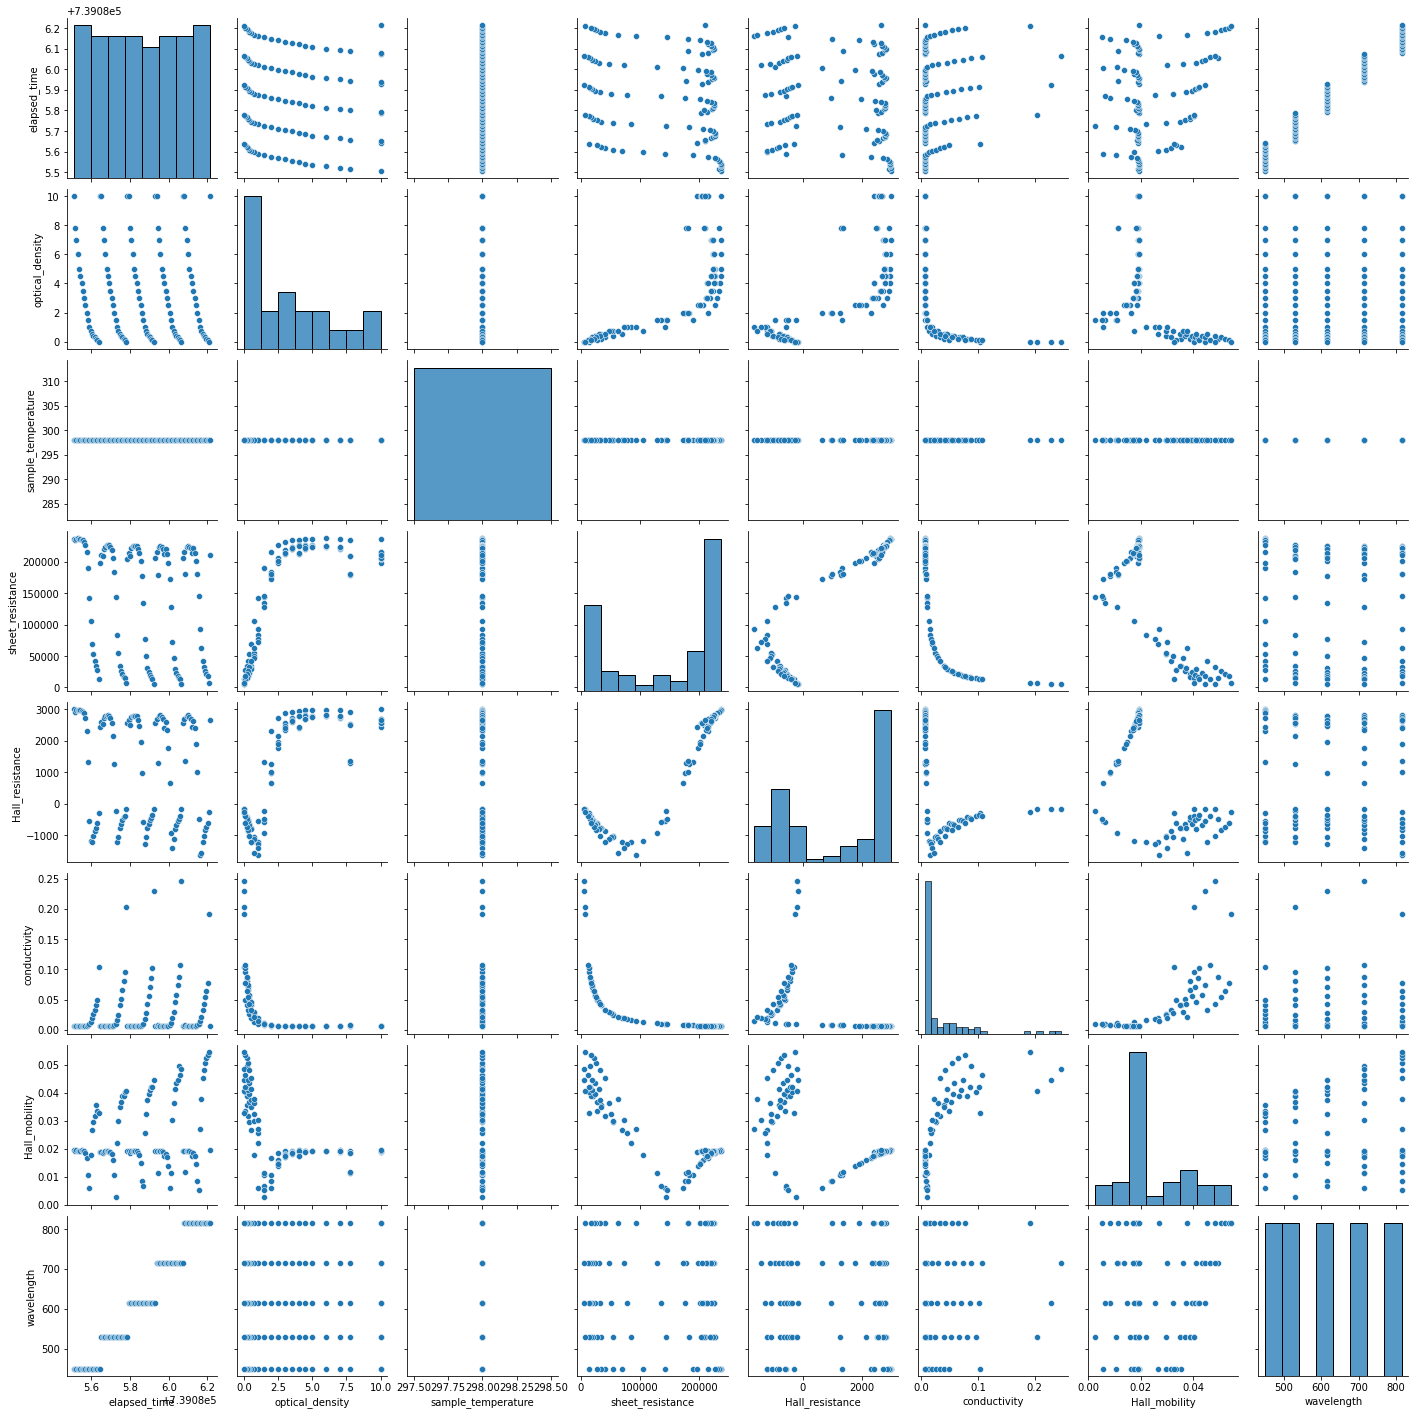

In [56]:
# Data Visualization

# Pairplot for selected numeric columns
sns.pairplot(df[['elapsed_time', 'optical_density', 'sample_temperature', 'sheet_resistance', 
                'Hall_resistance', 'conductivity', 'Hall_mobility', 'wavelength']])
plt.show()



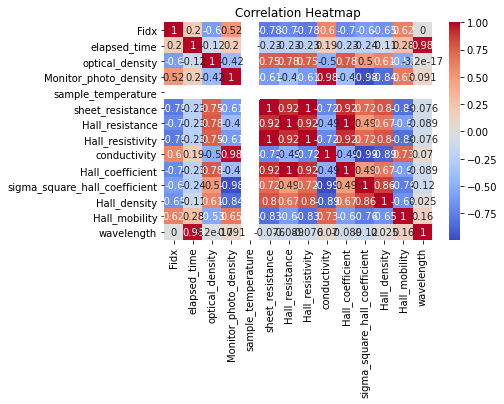

In [59]:
# Correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# # Boxplot for 'Type' vs 'Hall_mobility'
# sns.boxplot(x='Type', y='Hall_mobility', data=df)
# plt.title('Type vs Hall Mobility')
# plt.show()

In [14]:
prompt = """
Generate exploratory data analysis based on the following data '''{df}'''
"""

In [23]:
get_completion(prompt)

RateLimitError: You exceeded your current quota, please check your plan and billing details.